# [参考文章](https://blog.csdn.net/weixin_43584807/article/details/105162516)

C:\Users\Zz\Anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


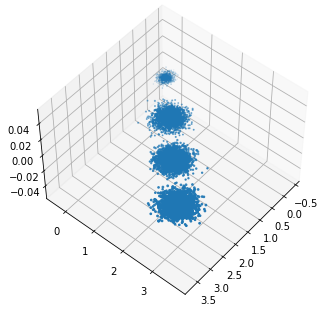

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
# X为样本特征，y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3,3], [0,0,0], [1,1,1], [2,2,2]], 
                  cluster_std=[0.2, 0.1, 0.2, 0.2], random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=40)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')
plt.show()


In [7]:
print(X.shape)

(10000, 3)


[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]
[0.98318212 0.00850037]
[3.78521638 0.03272613]


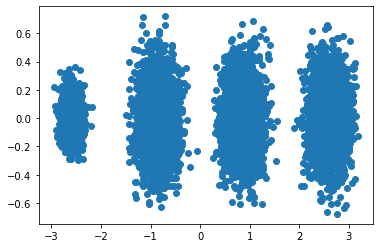

[0.98318212]
[3.78521638]
1
[0.98318212 0.00850037]
[3.78521638 0.03272613]
2
[0.98318212]
[3.78521638]
1


In [8]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=3) #不降维
pca1.fit(X)
print (pca1.explained_variance_ratio_)#降维后的各主成分的方差值占总方差值的比例，比例越大，越是重要的主成分
print (pca1.explained_variance_)#降维后的各主成分的方差值，方差越大，越是重要的主成分

pca2 = PCA(n_components=2) #三维降为2维
pca2.fit(X)
print (pca2.explained_variance_ratio_)#降维后的各主成分的方差值占总方差值的比例，比例越大，越是重要的主成分
print (pca2.explained_variance_)#降维后的各主成分的方差值，方差越大，越是重要的主成分

X_new = pca2.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

pca3 = PCA(n_components=0.95)#指定主成分的方差和所占的最小比例阈值，让PCA类自己去根据样本特征方差来决定降维到的维度数，此时n_components是一个（0，1]之间的数
pca3.fit(X)
print (pca3.explained_variance_ratio_)
print (pca3.explained_variance_)
print (pca3.n_components_)

pca4 = PCA(n_components=0.99) #主成分至少占98%
pca4.fit(X)
print (pca4.explained_variance_ratio_)
print (pca4.explained_variance_)
print (pca4.n_components_)

#让MLE算法自己选择降维维度的效果
pca = PCA(n_components='mle')
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

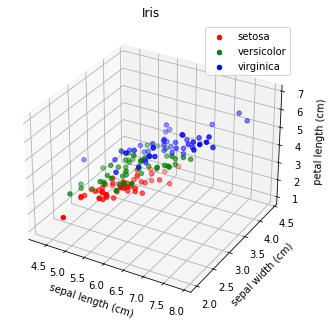

In [9]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA  #PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  #LDA
from sklearn import svm

data=datasets.load_iris()
X=data['data']
y=data['target']

#选取三个特征查看数据分布情况
ax = Axes3D(plt.figure())
for c,i,target_name in zip('rgb',[0,1,2],data.target_names):
    ax.scatter(X[y==i ,0], X[y==i, 1], X[y==i,2], c=c, label=target_name)
ax.set_xlabel(data.feature_names[0])
ax.set_ylabel(data.feature_names[1])
ax.set_zlabel(data.feature_names[2])
ax.set_title("Iris")
plt.legend()
plt.show()


In [10]:
print(y)
print(X)
print(y==i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

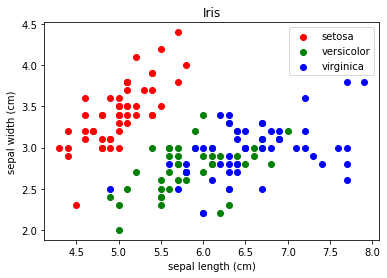

In [11]:
# 选取两个特征查看数据分布情况
for c, i, target_name in zip("rgb", [0, 1, 2], data.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c, label=target_name)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Iris")
plt.legend()
plt.show()

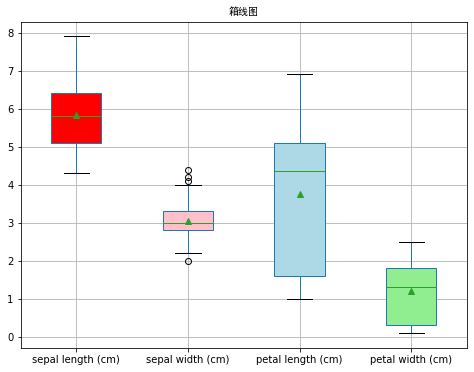

In [12]:
df=pd.DataFrame(X,columns=data.feature_names)
fig = plt.figure(figsize=(8,6))
f = df.boxplot(sym = 'o',            #异常点形状
               vert = True,          # 是否垂直
               whis=1.5,             # IQR(四分位数的间距)
               patch_artist = True,  # 上下四分位框是否填充
               meanline = False,showmeans = True,  # 是否有均值线及其形状
               showbox = True,   # 是否显示箱线
               showfliers = True,  #是否显示异常值
               notch = False,    # 中间箱体是否缺口
               #notch = True,
               return_type='dict')  # 返回类型为字典
colors = ['r','pink', 'lightblue', 'lightgreen']
for patch, color in zip(f['boxes'], colors):
    patch.set_facecolor(color)  # 为不同的箱型图填充不同的颜色
plt.title('箱线图',fontproperties= 'simHei')
plt.show()

[0.92461872 0.05306648]
[4.22824171 0.24267075]
2


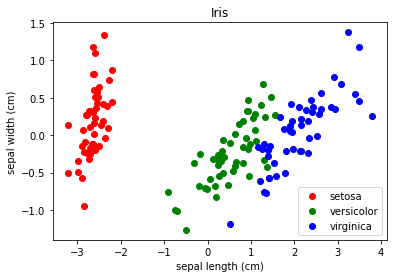

No handles with labels found to put in legend.


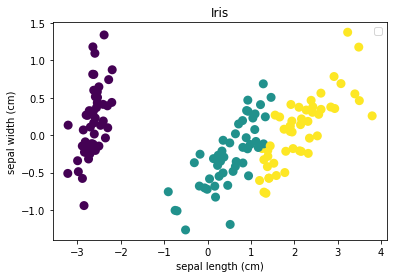

利用PCA后的前两维度特征对鸢尾花数据集分类精度为：
score=  0.96


In [13]:
# pca降维，将三维降到二维
pca = PCA(n_components=2)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)
X_p =pca.transform(X)
for c, i, target_name in zip("rgb", [0, 1, 2], data.target_names):
    plt.scatter(X_p[y == i, 0], X_p[y == i, 1], c=c, label=target_name)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Iris")
plt.legend()
plt.show()

#PCA降维后做支持向量机拟合预测
clf = svm.SVC()
clf.fit(X_p[:, 0:2], y.reshape(y.shape[0], ))
y_predict = clf.predict(X_p[:, 0:2])

# 绘制SVM分类结果
plt.title("对前两个特征做PCA降维后做支持向量机")
plt.scatter(X_p[:, 0], X_p[:, 1], 
			c= y_predict.reshape(y.shape[0], ), lw= 3)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Iris")
plt.legend()
plt.show()

# 评价分类准确率
score1 = clf.score(X_p[:, 0:2], y)
print("利用PCA后的前两维度特征对鸢尾花数据集分类精度为：")
print("score= ", score1)


In [14]:
print(X_p)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

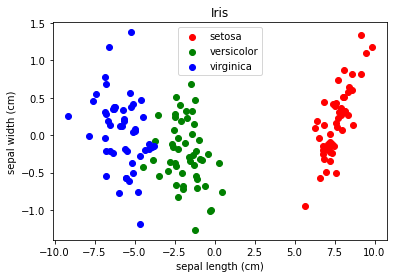

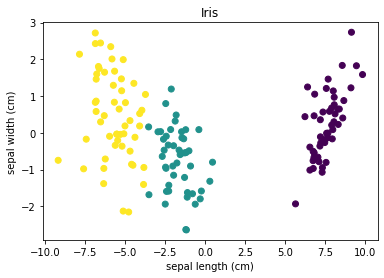

利用PCA后的前两维度特征对鸢尾花数据集分类精度为：
score=  0.98


In [15]:
#LDA降维，将三维降到二维
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
X_l = lda.transform(X)
for c, i, target_name in zip("rgb", [0, 1, 2], data.target_names):
    plt.scatter(X_l[y == i, 0], X_p[y == i, 1], c=c, label=target_name)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Iris")
plt.legend()
plt.show()
#LDA降维后做支持向量机拟合预测
clf = svm.SVC()
clf.fit(X_l[:, 0:2], y.reshape(y.shape[0], ))
y_predict2 = clf.predict(X_l[:, 0:2])
plt.title("对前两个特征做LDA降维后做SVM")
plt.scatter(X_l[:, 0], X_l[:, 1], 
			c= y_predict2.reshape(y.shape[0], ))
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Iris")
plt.show()
score2 = clf.score(X_l[:, 0:2], y)
print("利用PCA后的前两维度特征对鸢尾花数据集分类精度为：")
print("score= ", score2)
